ACTIVIDAD 4.2 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#JALAR DATASET
df = pd.read_csv('NEW YORK_LIMPIO_sinnulos.csv') 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36322 entries, 0 to 36321
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36322 non-null  int64  
 1   id                            36322 non-null  float64
 2   last_scraped                  36322 non-null  object 
 3   source                        36322 non-null  object 
 4   host_since                    36322 non-null  object 
 5   host_location                 36322 non-null  object 
 6   host_about                    36322 non-null  object 
 7   host_response_time            36322 non-null  object 
 8   host_response_rate            36322 non-null  object 
 9   host_acceptance_rate          36322 non-null  float64
 10  host_is_superhost             36322 non-null  object 
 11  host_picture_url              36322 non-null  object 
 12  host_neighbourhood            36322 non-null  object 
 13  h

<Figure size 1500x800 with 0 Axes>

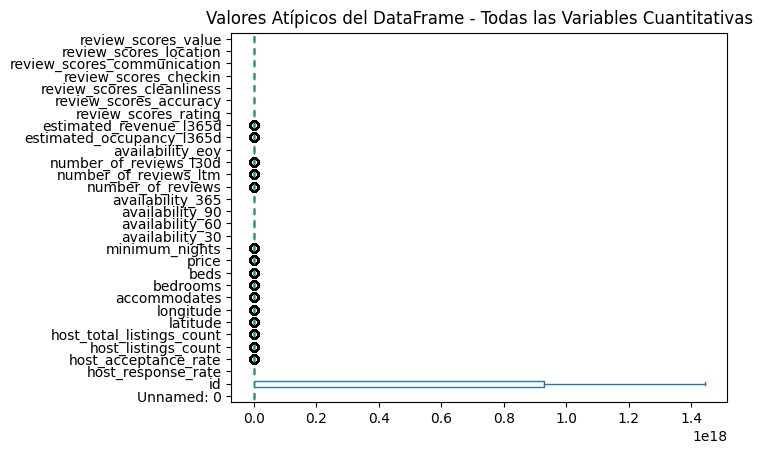

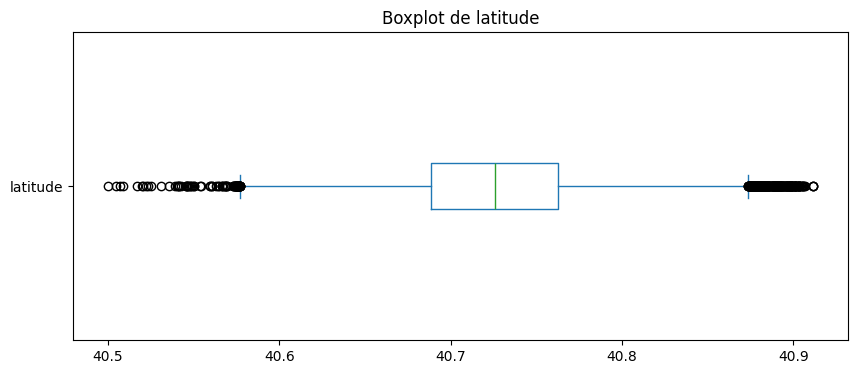

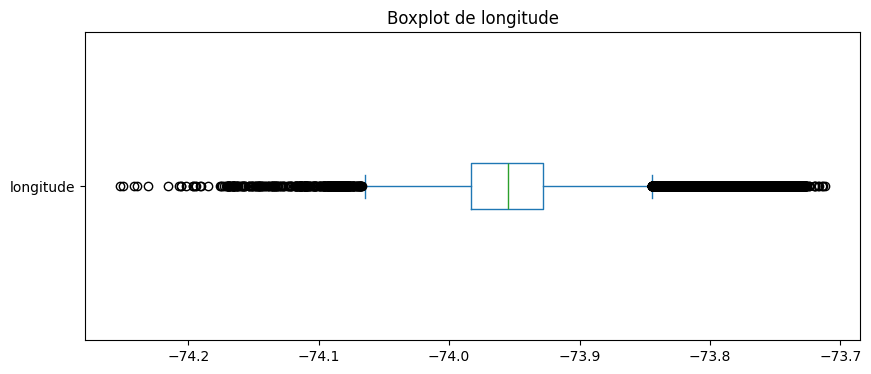

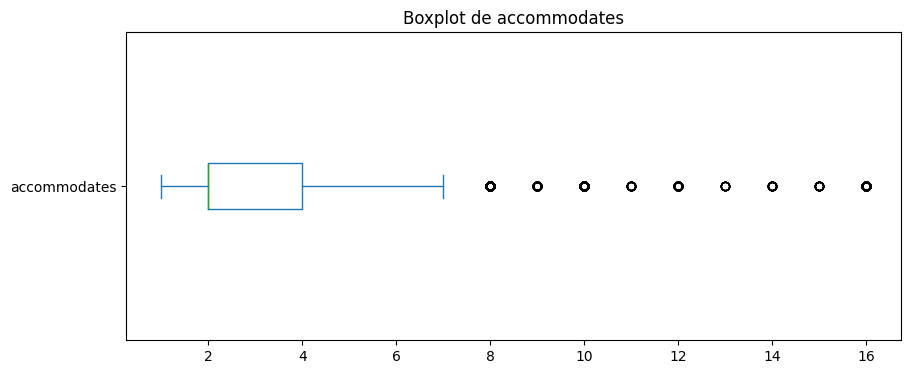

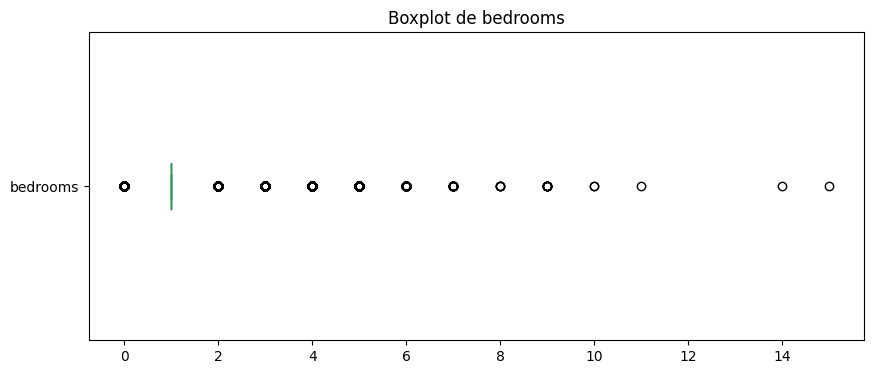

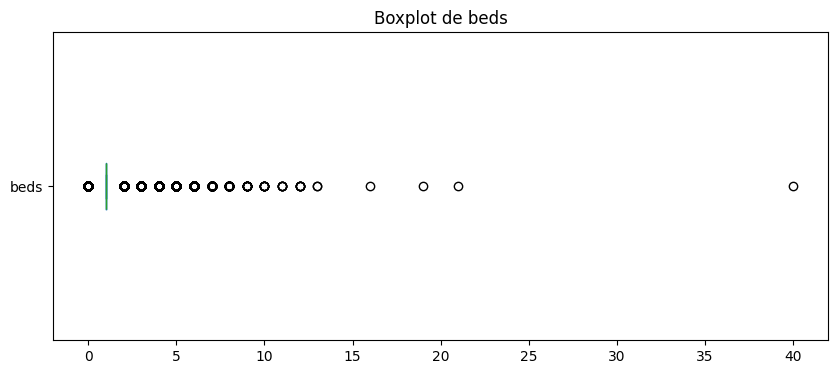

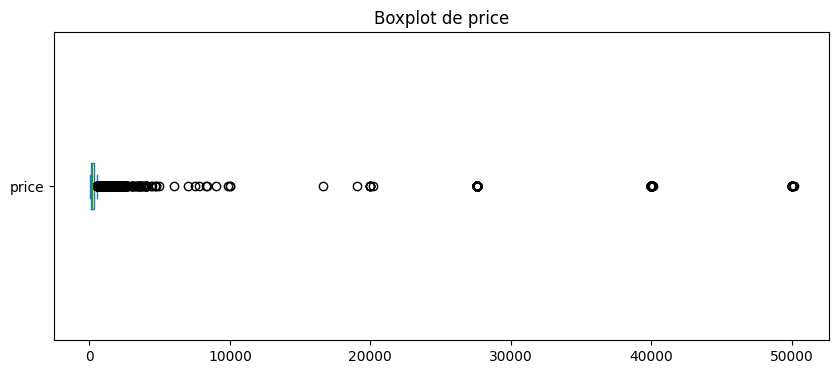

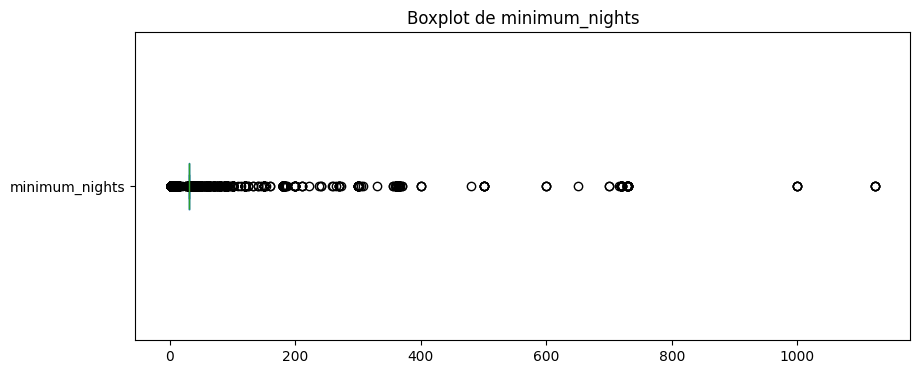

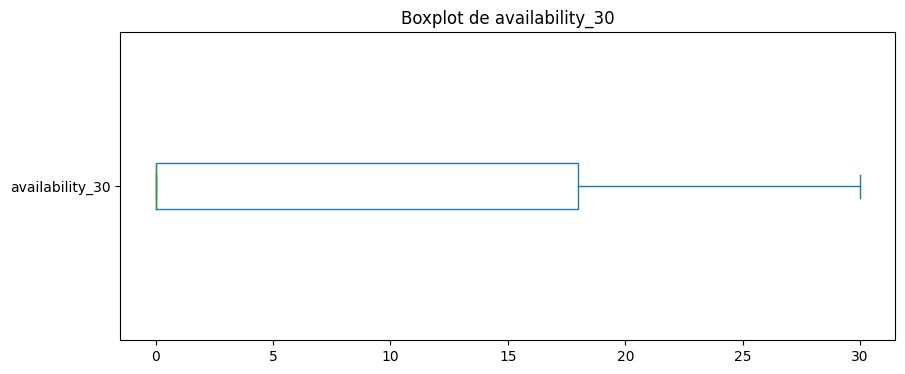

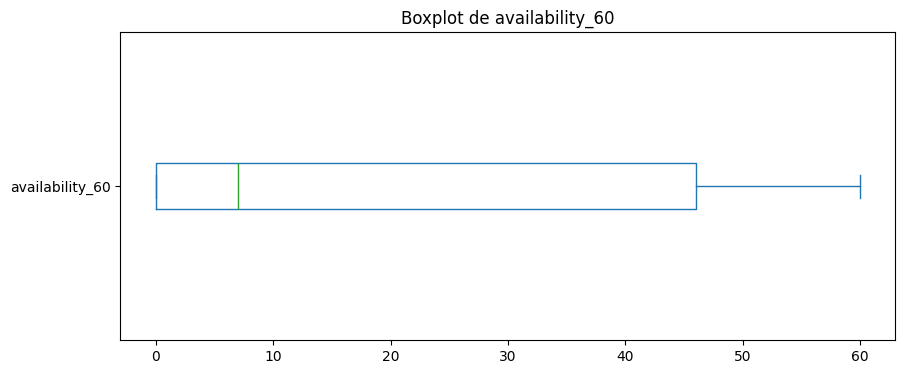

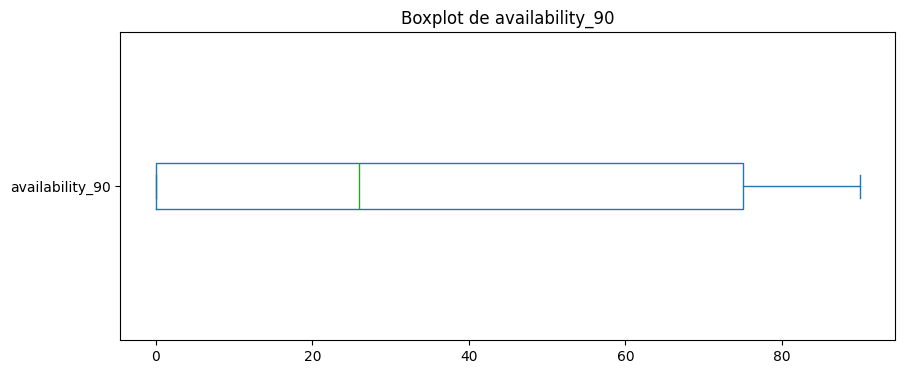

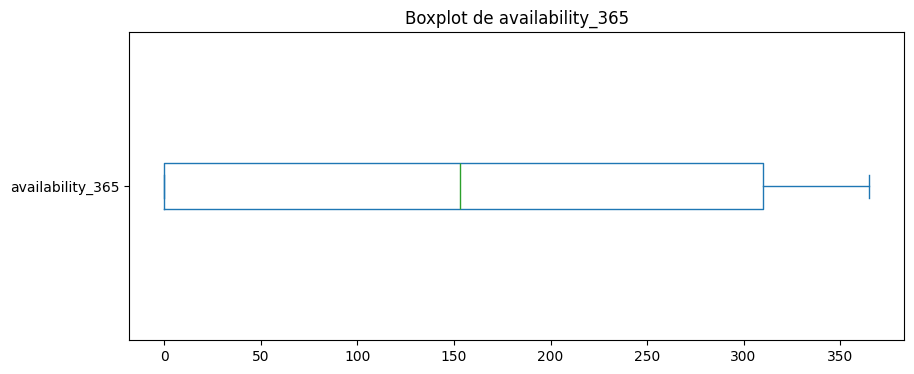

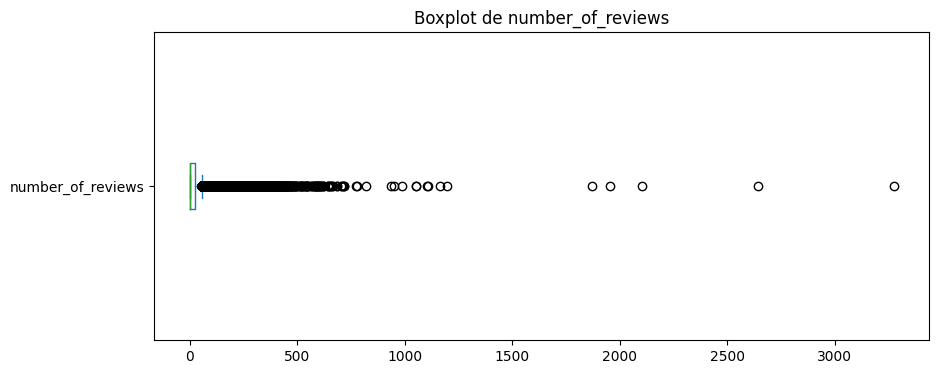

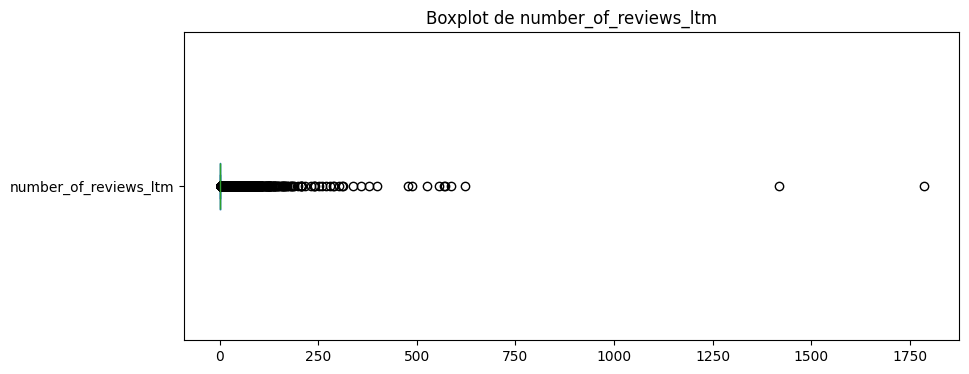

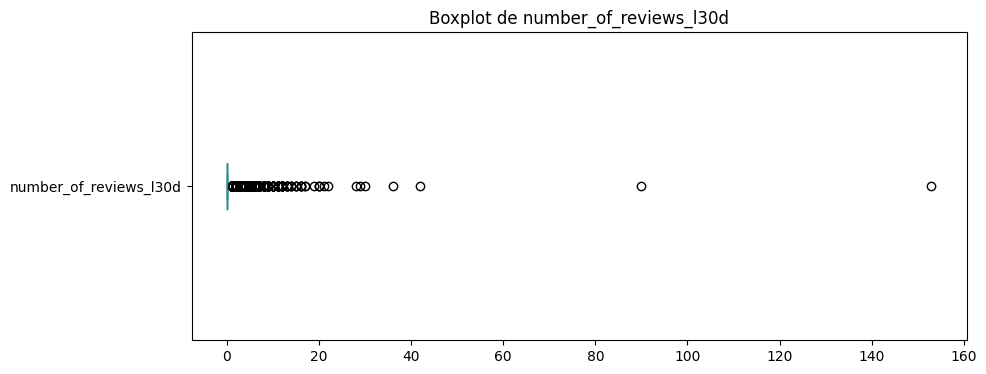

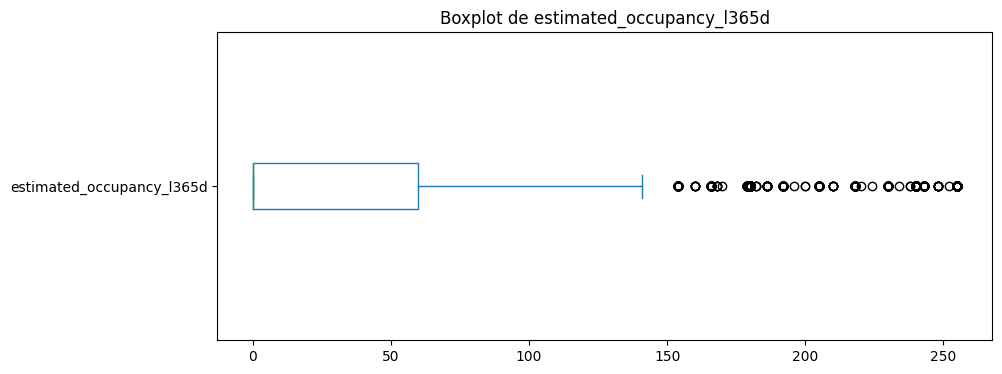

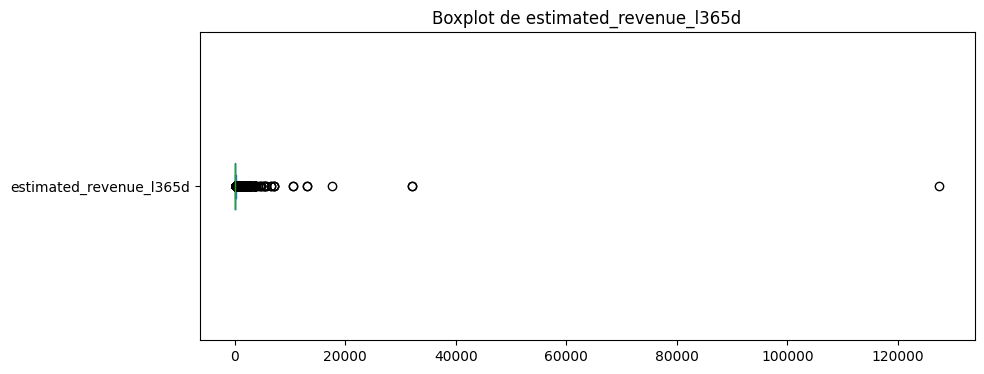

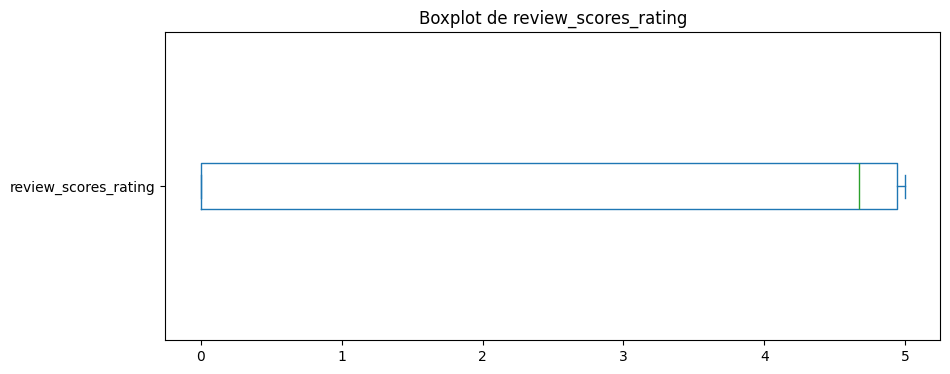

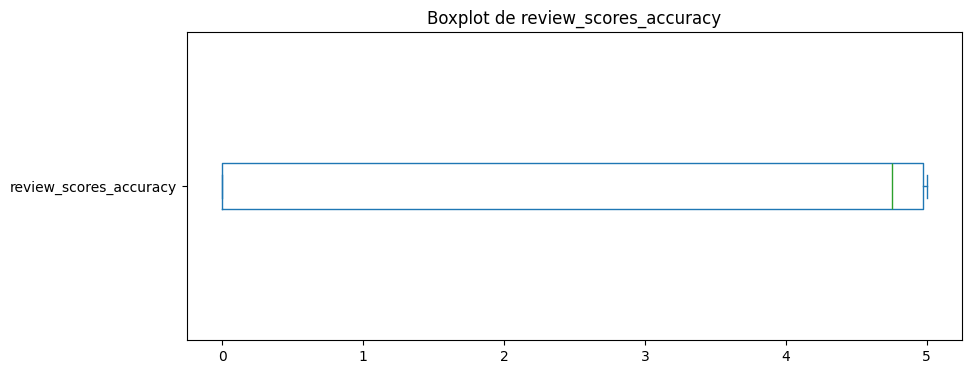

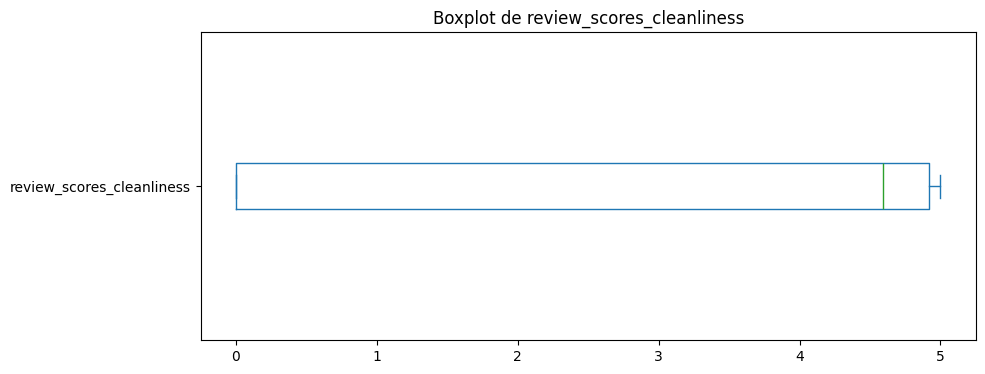

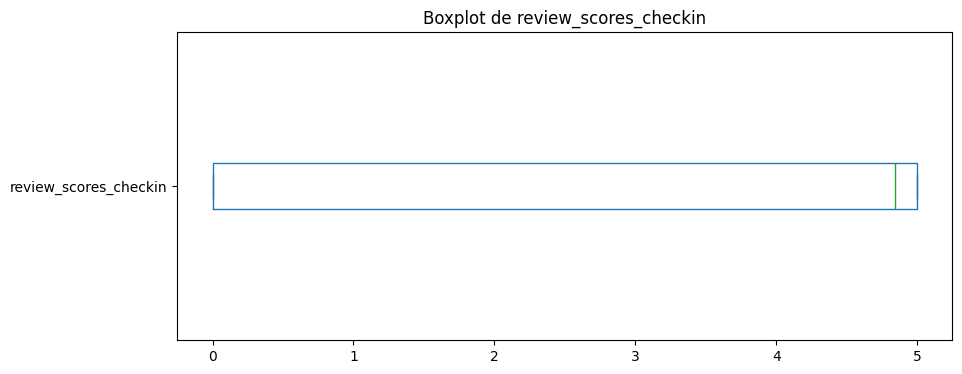

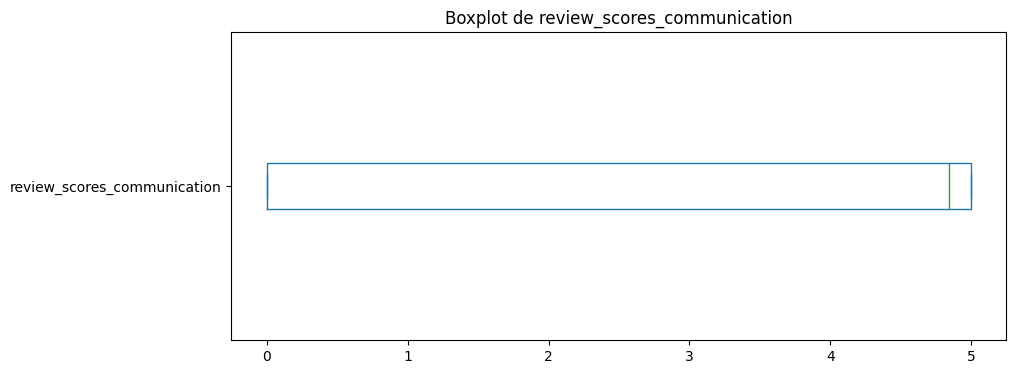

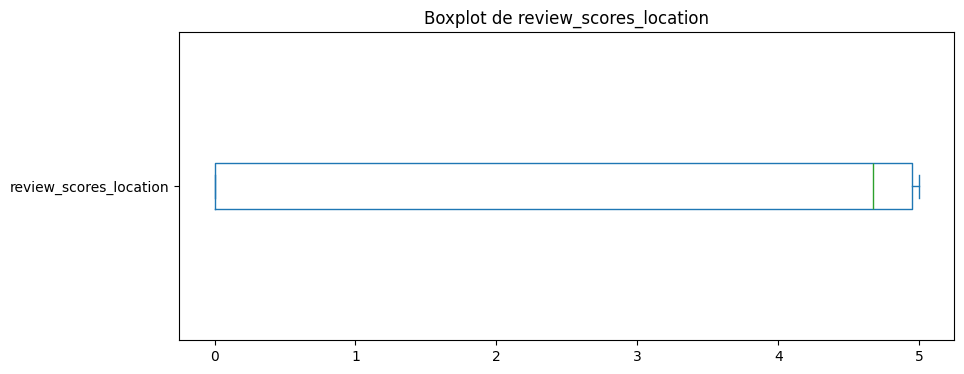

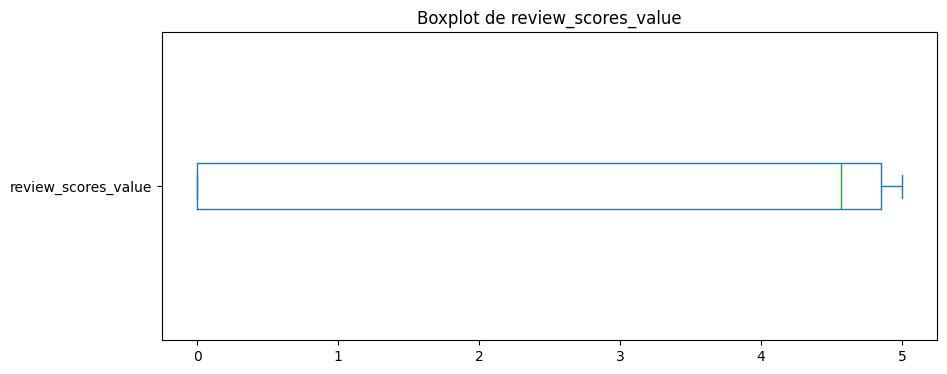

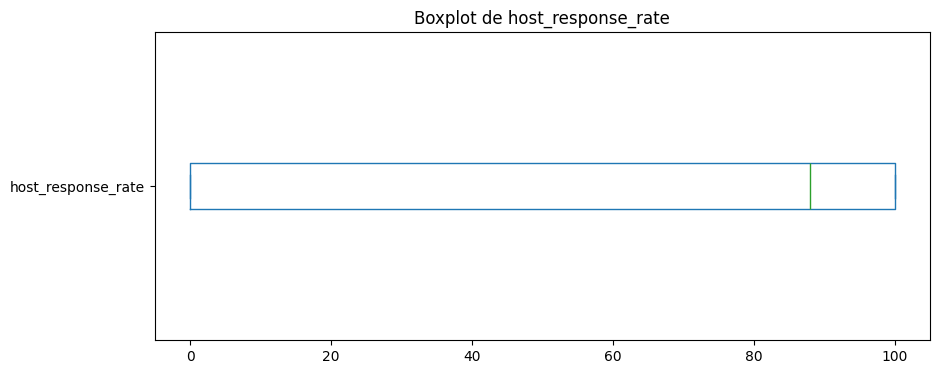

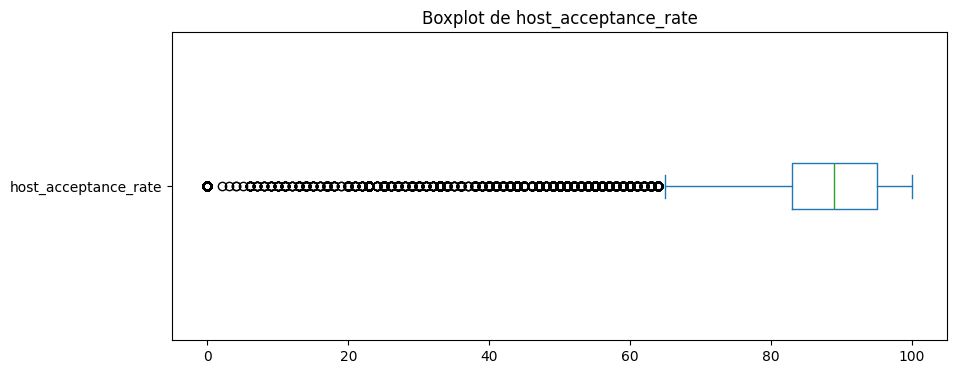

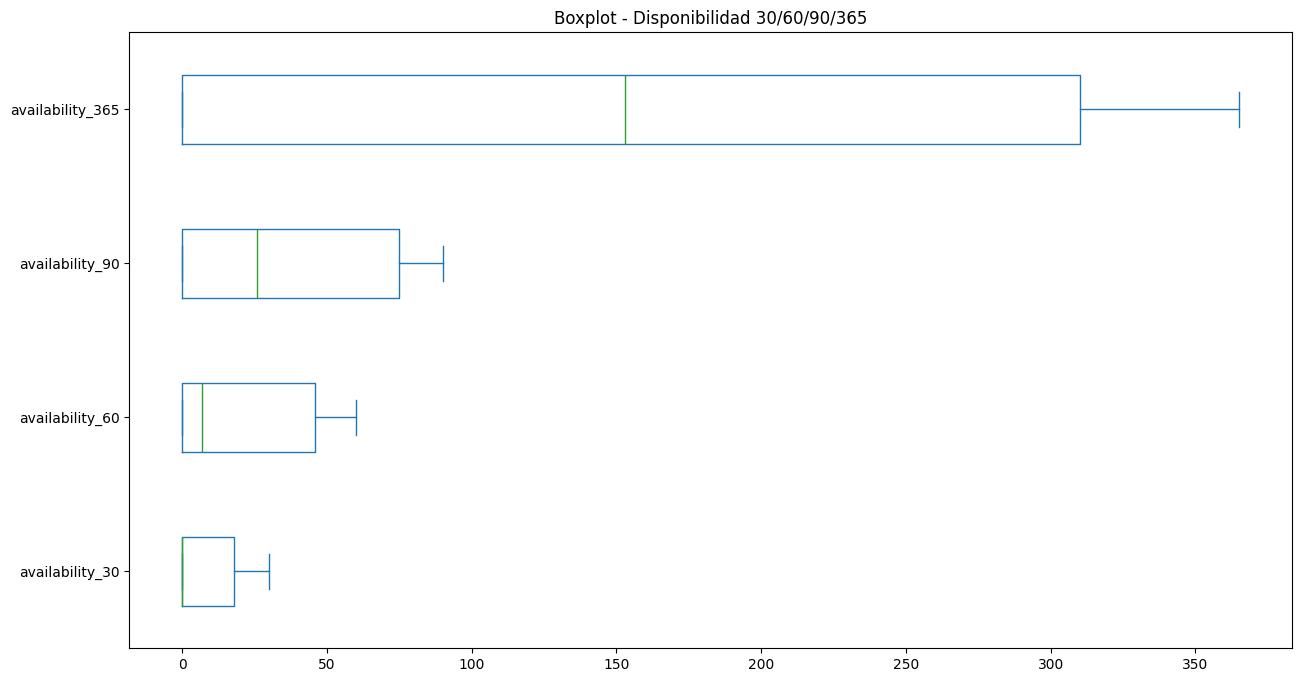

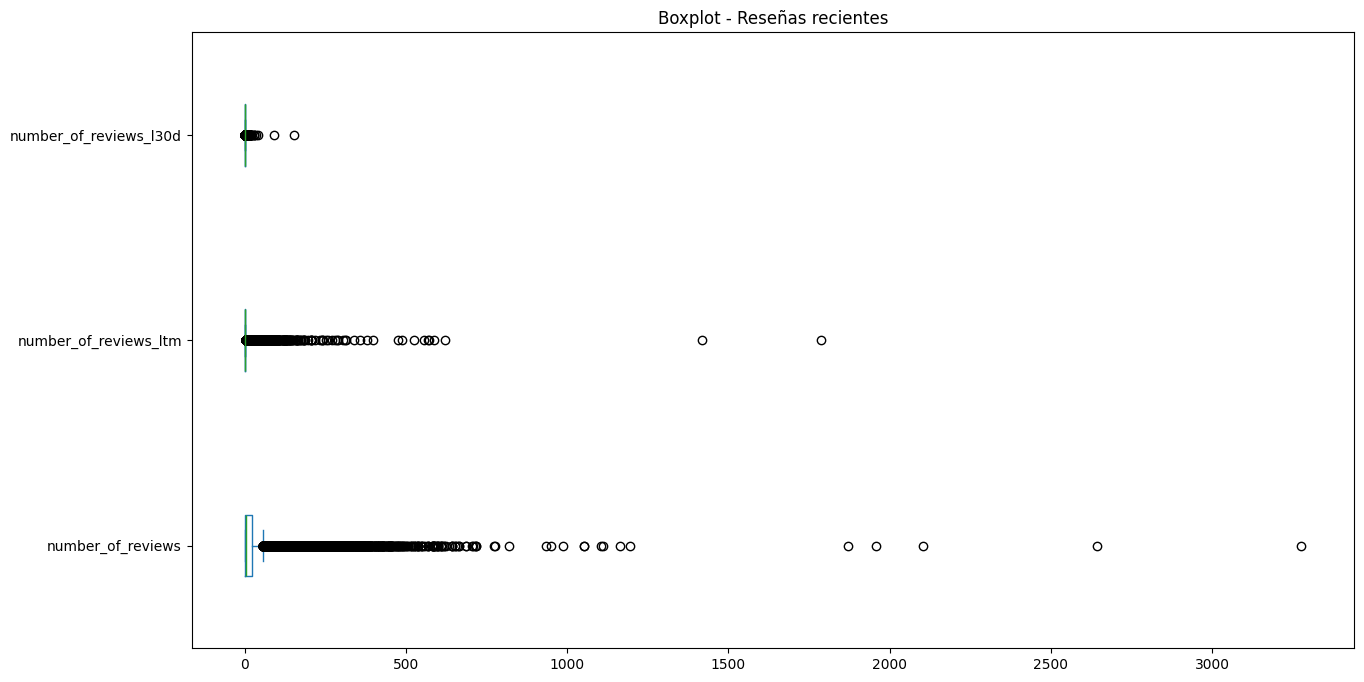

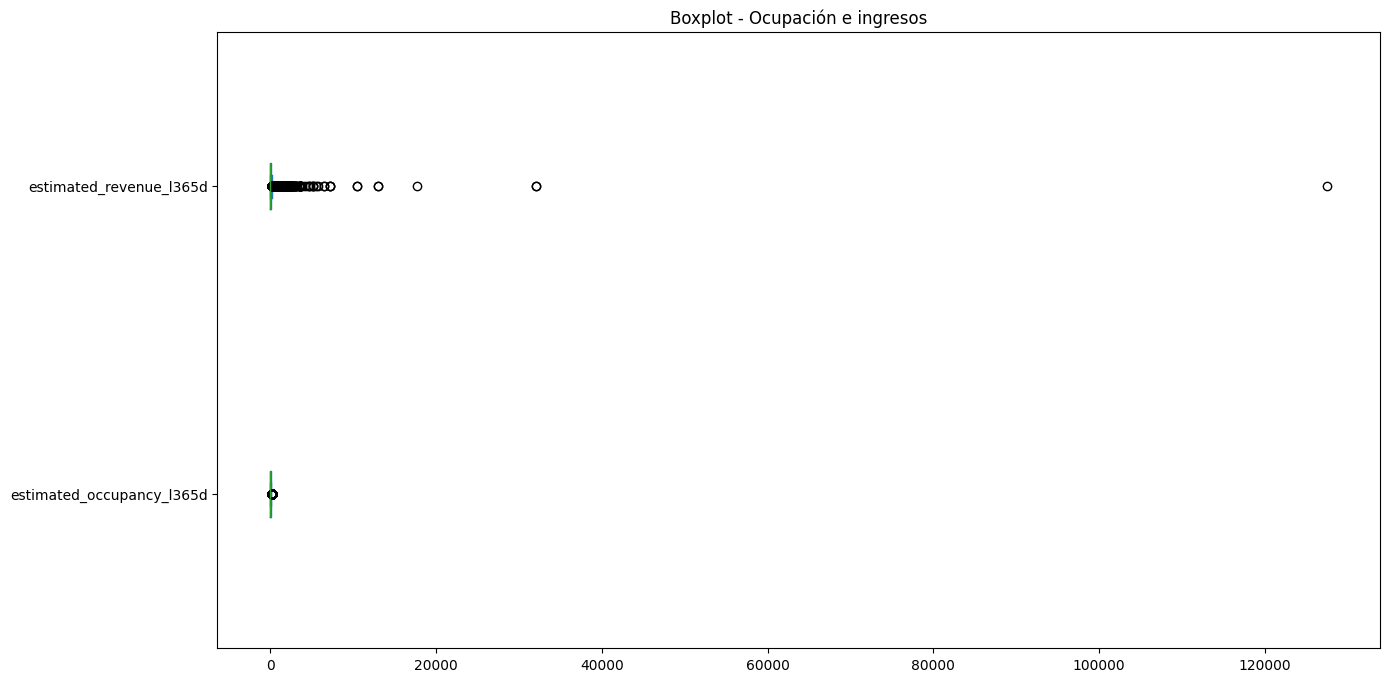

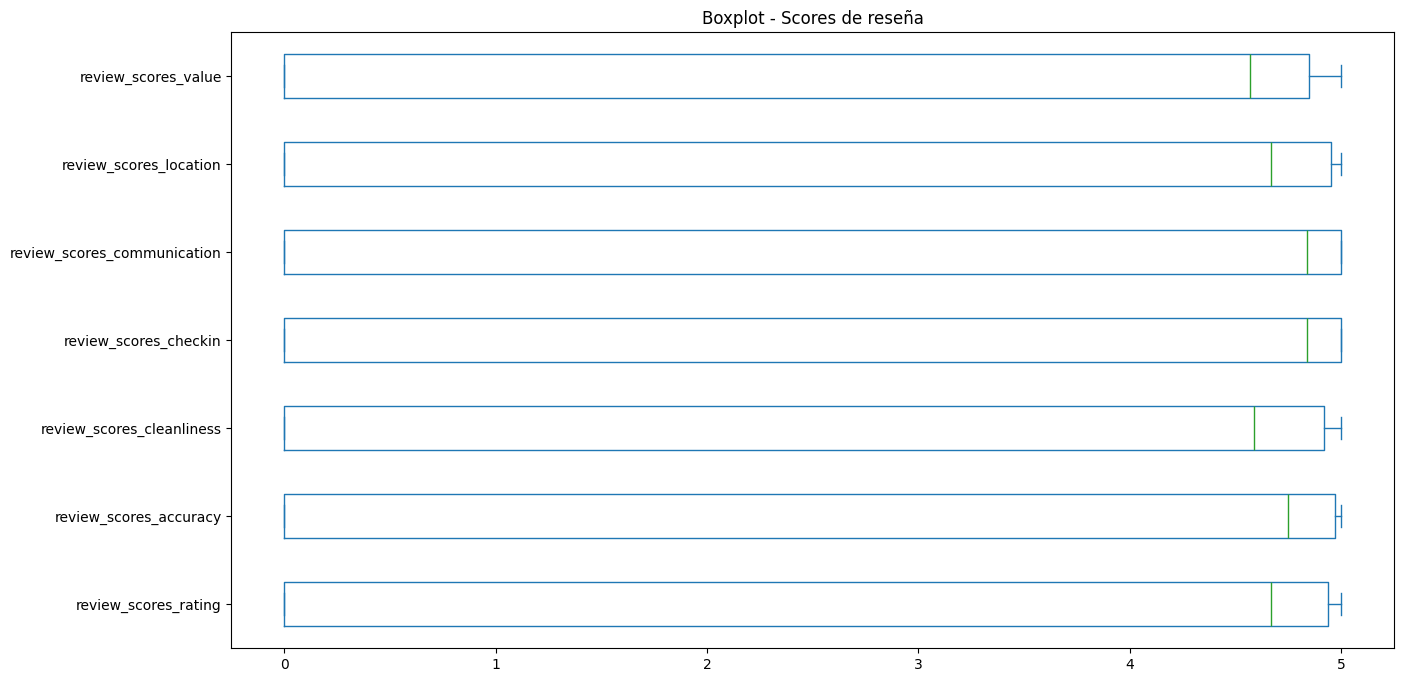

In [5]:
#Valores atitpicos del dataframe 
# Limpiar columnas de porcentaje si existen
for pct_col in ["host_response_rate", "host_acceptance_rate"]:
    if pct_col in df.columns:
        df[pct_col] = (
            df[pct_col]
            .astype(str)
            .str.replace("%", "", regex=False)
            .str.strip()
        )
        df[pct_col] = pd.to_numeric(df[pct_col], errors="coerce")

# Limpiar columna "price" si tiene símbolos
if "price" in df.columns and not pd.api.types.is_numeric_dtype(df["price"]):
    df["price"] = (
        df["price"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Solo variables numéricas
cuantitativas = df.select_dtypes(include=["number"]).copy()

# ===== Boxplot general =====
plt.figure(figsize=(15, 8))
cuantitativas.plot(kind="box", vert=False)
plt.title("Valores Atípicos del DataFrame - Todas las Variables Cuantitativas")
plt.show()

# ===== Boxplots individuales =====
cols_individuales = [
    "latitude", "longitude",
    "accommodates", "bedrooms", "beds",
    "price", "minimum_nights",
    "availability_30", "availability_60", "availability_90", "availability_365",
    "number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d",
    "estimated_occupancy_l365d", "estimated_revenue_l365d",
    "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
    "review_scores_checkin", "review_scores_communication",
    "review_scores_location", "review_scores_value",
    "host_response_rate", "host_acceptance_rate"
]

for col in cols_individuales:
    if col in cuantitativas.columns:
        cuantitativas[col].plot(kind="box", vert=False, figsize=(10, 4))
        plt.title(f"Boxplot de {col}")
        plt.show()

# ===== Boxplots por grupos =====
grupos = {
    "Disponibilidad 30/60/90/365": ["availability_30", "availability_60", "availability_90", "availability_365"],
    "Reseñas recientes": ["number_of_reviews", "number_of_reviews_ltm", "number_of_reviews_l30d"],
    "Ocupación e ingresos": ["estimated_occupancy_l365d", "estimated_revenue_l365d"],
    "Scores de reseña": [
        "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness",
        "review_scores_checkin", "review_scores_communication",
        "review_scores_location", "review_scores_value"
    ]
}

for titulo, cols in grupos.items():
    cols_presentes = [c for c in cols if c in cuantitativas.columns]
    if cols_presentes:
        cuantitativas[cols_presentes].plot(kind="box", vert=False, figsize=(15, 8))
        plt.title(f"Boxplot - {titulo}")
        plt.show()


DESVIACIÓN ESTANDAR 

In [6]:
cuantitativas = df.iloc[:, [3, 4, 10, 11] + list(range(14, 47))]
cualitativas = df.iloc[:, [2, 3, 5, 6, 7, 8, 9, 12, 13, 48, 49, 50]]


In [9]:
y = cuantitativas.select_dtypes(include='number')

Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()

print("Límite superior permitido:\n", Limite_Superior)
print("\nLímite inferior permitido:\n", Limite_Inferior)



Límite superior permitido:
 host_total_listings_count    800.777504
latitude                      40.900476
longitude                    -73.814692
accommodates                   6.472718
bedrooms                       2.890009
beds                           2.800930
price                        665.653415
minimum_nights                59.835416
availability_30               42.371734
availability_60               89.540799
availability_90              138.889336
availability_365             575.861364
number_of_reviews            123.406980
number_of_reviews_ltm         11.912005
number_of_reviews_l30d         0.985995
availability_eoy             317.781810
estimated_occupancy_l365d    239.963233
estimated_revenue_l365d      374.520547
review_scores_rating           9.891179
review_scores_accuracy         9.975826
dtype: float64

Límite inferior permitido:
 host_total_listings_count   -671.062308
latitude                      40.561236
longitude                    -74.084108
accommod

In [10]:
# Outliers se convierten en nulos 
df3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28546 entries, 0 to 36321
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   source                        0 non-null      object 
 1   host_since                    0 non-null      object 
 2   host_is_superhost             0 non-null      object 
 3   host_picture_url              0 non-null      object 
 4   host_total_listings_count     27801 non-null  float64
 5   host_verifications            0 non-null      object 
 6   host_has_profile_pic          0 non-null      object 
 7   host_identity_verified        0 non-null      object 
 8   neighbourhood                 0 non-null      object 
 9   neighbourhood_cleansed        0 non-null      object 
 10  neighbourhood_group_cleansed  0 non-null      object 
 11  latitude                      28545 non-null  float64
 12  longitude                     27962 non-null  float64
 13  proper

In [14]:
df_clean = df3.copy()

# Rellenar NaN solo en columnas numéricas con la media redondeada a 1 decimal
df_clean = df_clean.fillna(df3.select_dtypes(include='number').mean().round(1))

df_clean


,source,host_since,host_is_superhost,host_picture_url,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy
0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,9.0,0.0,0.0,180,0.0,0.0,NaN,NaN,4.89,4.88
1,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,49.0,0.0,0.0,145,0.0,0.0,NaN,NaN,4.68,4.73
2,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,80,0.0,0.0,NaN,NaN,4.75,4.75
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,12.8,4.0,0.0,52,21.9,232.8,NaN,NaN,4.59,4.60
4,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,2,0.0,0.0,NaN,NaN,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,194,0.0,0.0,NaN,NaN,0.00,0.00
36318,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,118,0.0,0.0,NaN,NaN,0.00,0.00
36319,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,171,0.0,0.0,NaN,NaN,0.00,0.00
36320,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,180,0.0,0.0,NaN,NaN,0.00,0.00


In [15]:
valores_nulos=df_clean.isnull().sum()
valores_nulos

source                          28546
host_since                      28546
host_is_superhost               28546
host_picture_url                28546
host_total_listings_count           0
host_verifications              28546
host_has_profile_pic            28546
host_identity_verified          28546
neighbourhood                   28546
neighbourhood_cleansed          28546
neighbourhood_group_cleansed    28546
latitude                            0
longitude                           0
property_type                   28546
room_type                       28546
accommodates                        0
bathrooms_text                  28546
bedrooms                            0
beds                                0
price                               0
minimum_nights                      0
has_availability                28546
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
calendar_las

In [16]:
df_clean.to_csv("NEWYORK_Sin_Atipicos_Desv.csv")

PROCEDIMIENTO DE CUANTILES 

<Figure size 1500x800 with 0 Axes>

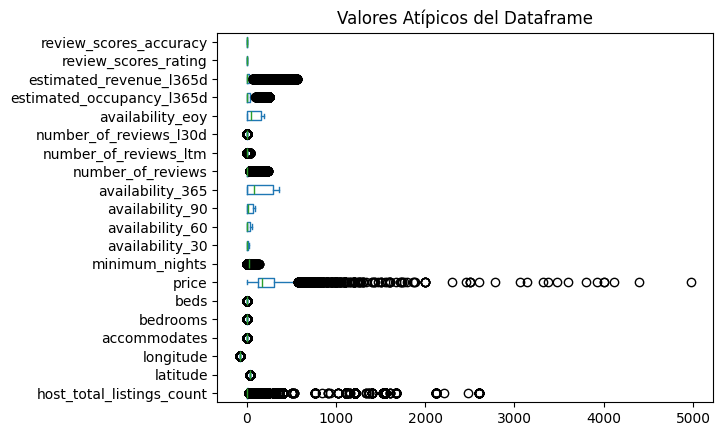

In [17]:
# Boxplot general después de limpiar outliers
plt.close('all')  # Cerrar figuras anteriores
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
#cuantitativas['subtotal_ventas_alimentos_bebidas'].plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [19]:
for col in cuantitativas.select_dtypes(include='number'):
    q1 = cuantitativas[col].quantile(0.25)
    q3 = cuantitativas[col].quantile(0.75)
    iqr = q3 - q1

    limite_inf = q1 - 1.5*iqr
    limite_sup = q3 + 1.5*iqr

    print(f"{col} → Límite inferior: {limite_inf}, Límite superior: {limite_sup}")


host_total_listings_count → Límite inferior: -12.5, Límite superior: 23.5
latitude → Límite inferior: 40.57798718250001, Límite superior: 40.875701362499996
longitude → Límite inferior: -74.0614925, Límite superior: -73.84967250000001
accommodates → Límite inferior: 0.5, Límite superior: 4.5
bedrooms → Límite inferior: 1.0, Límite superior: 1.0
beds → Límite inferior: 1.0, Límite superior: 1.0
price → Límite inferior: -137.00760966875555, Límite superior: 572.3460161145927
minimum_nights → Límite inferior: 30.0, Límite superior: 30.0
availability_30 → Límite inferior: -24.0, Límite superior: 40.0
availability_60 → Límite inferior: -64.5, Límite superior: 107.5
availability_90 → Límite inferior: -103.125, Límite superior: 171.875
availability_365 → Límite inferior: -435.0, Límite superior: 725.0
number_of_reviews → Límite inferior: -24.0, Límite superior: 40.0
number_of_reviews_ltm → Límite inferior: -1.5, Límite superior: 2.5
number_of_reviews_l30d → Límite inferior: 0.0, Límite superi

In [21]:
#Obtenemos datos limpios del Dataframe
df3_iqr = cuantitativas.copy()

for col in cuantitativas.select_dtypes(include='number'):
    q1 = cuantitativas[col].quantile(0.25)
    q3 = cuantitativas[col].quantile(0.75)
    iqr = q3 - q1

    li, ls = q1 - 1.5*iqr, q3 + 1.5*iqr
    df3_iqr = df3_iqr[(df3_iqr[col] >= li) & (df3_iqr[col] <= ls)]

df3_iqr


,source,host_since,host_is_superhost,host_picture_url,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy
0,city scrape,2008-09-07,f,https://a0.muscache.com/im/pictures/user/User/...,13,"['email', 'phone']",True,True,Neighborhood highlights,Kensington,...,9,0,0,180,0,0.0,2015-12-04,2018-10-19,4.89,4.88
4,previous scrape,2009-05-07,f,https://a0.muscache.com/im/pictures/user/d865a...,2,"['email', 'phone', 'work_email']",True,False,Neighborhood highlights,East Harlem,...,1,0,0,2,0,0.0,2022-06-05,2022-06-05,5.00,5.00
6,previous scrape,2009-05-15,f,https://a0.muscache.com/im/users/17297/profile...,2,"['email', 'phone', 'work_email']",True,True,Neighborhood highlights,Williamsburg,...,13,0,0,0,0,0.0,2010-08-17,2022-09-12,4.91,5.00
9,previous scrape,2010-05-20,f,https://a0.muscache.com/im/users/128806/profil...,2,"['email', 'phone']",True,True,Neighborhood highlights,East Village,...,37,0,0,0,0,0.0,2011-02-27,2023-09-03,4.81,4.92
10,previous scrape,2010-03-26,f,https://a0.muscache.com/im/users/99212/profile...,3,"['email', 'phone']",True,True,Neighborhood highlights,Greenwich Village,...,9,0,0,0,0,0.0,2010-12-07,2019-07-31,4.88,4.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36314,city scrape,2014-07-27,t,https://a0.muscache.com/im/pictures/user/6177c...,4,"['email', 'phone']",True,True,No especificado,Harlem,...,0,0,0,153,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36316,city scrape,2013-08-15,t,https://a0.muscache.com/im/pictures/user/46a55...,3,"['email', 'phone']",True,True,No especificado,Upper West Side,...,0,0,0,198,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36317,city scrape,2021-06-24,f,https://a0.muscache.com/defaults/user_pic-225x...,4,['phone'],False,True,No especificado,Lower East Side,...,0,0,0,194,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36318,city scrape,2012-04-05,f,https://a0.muscache.com/im/users/2076525/profi...,2,"['email', 'phone']",True,True,No especificado,Fort Greene,...,0,0,0,118,0,0.0,2000-01-19,2030-06-19,0.00,0.00


In [ ]:
#checar los nulos
valores_nulos=df3_iqr.isnull().sum()
valores_nulos

source                          0
host_since                      0
host_is_superhost               0
host_picture_url                0
host_total_listings_count       0
host_verifications              0
host_has_profile_pic            0
host_identity_verified          0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                  0
bedrooms                        0
beds                            0
price                           0
minimum_nights                  0
has_availability                0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
calendar_last_scraped           0
number_of_reviews               0
number_of_reviews_ltm           0
number_of_revi

In [25]:
# Rellenar NaN solo en columnas numéricas con la mediana redondeada a 1 decimal
df4_iqr = df3_iqr.copy()

num = df4_iqr.select_dtypes(include='number').columns
df4_iqr[num] = df4_iqr[num].fillna(df4_iqr[num].median().round(1))
obj = df4_iqr.select_dtypes(exclude='number').columns
df4_iqr[obj] = df4_iqr[obj].fillna('Unknown')
df4_iqr

,source,host_since,host_is_superhost,host_picture_url,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy
0,city scrape,2008-09-07,f,https://a0.muscache.com/im/pictures/user/User/...,13,"['email', 'phone']",True,True,Neighborhood highlights,Kensington,...,9,0,0,180,0,0.0,2015-12-04,2018-10-19,4.89,4.88
4,previous scrape,2009-05-07,f,https://a0.muscache.com/im/pictures/user/d865a...,2,"['email', 'phone', 'work_email']",True,False,Neighborhood highlights,East Harlem,...,1,0,0,2,0,0.0,2022-06-05,2022-06-05,5.00,5.00
6,previous scrape,2009-05-15,f,https://a0.muscache.com/im/users/17297/profile...,2,"['email', 'phone', 'work_email']",True,True,Neighborhood highlights,Williamsburg,...,13,0,0,0,0,0.0,2010-08-17,2022-09-12,4.91,5.00
9,previous scrape,2010-05-20,f,https://a0.muscache.com/im/users/128806/profil...,2,"['email', 'phone']",True,True,Neighborhood highlights,East Village,...,37,0,0,0,0,0.0,2011-02-27,2023-09-03,4.81,4.92
10,previous scrape,2010-03-26,f,https://a0.muscache.com/im/users/99212/profile...,3,"['email', 'phone']",True,True,Neighborhood highlights,Greenwich Village,...,9,0,0,0,0,0.0,2010-12-07,2019-07-31,4.88,4.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36314,city scrape,2014-07-27,t,https://a0.muscache.com/im/pictures/user/6177c...,4,"['email', 'phone']",True,True,No especificado,Harlem,...,0,0,0,153,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36316,city scrape,2013-08-15,t,https://a0.muscache.com/im/pictures/user/46a55...,3,"['email', 'phone']",True,True,No especificado,Upper West Side,...,0,0,0,198,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36317,city scrape,2021-06-24,f,https://a0.muscache.com/defaults/user_pic-225x...,4,['phone'],False,True,No especificado,Lower East Side,...,0,0,0,194,0,0.0,2000-01-19,2030-06-19,0.00,0.00
36318,city scrape,2012-04-05,f,https://a0.muscache.com/im/users/2076525/profi...,2,"['email', 'phone']",True,True,No especificado,Fort Greene,...,0,0,0,118,0,0.0,2000-01-19,2030-06-19,0.00,0.00


In [ ]:
#hacer un nuevo dataframe con los datos limpios
Datos_limpios = pd.concat([cualitativas, df4_iqr], axis=1)
Datos_limpios

,last_scraped,source,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,review_scores_checkin,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy
0,2025-06-17,city scrape,"New York, NY",Educated professional living in Brooklyn. I l...,within a few hours,100,80.0,Gravesend,6,5.00,...,9.0,0.0,0.0,180.0,0.0,0.0,2015-12-04,2018-10-19,4.89,4.88
1,2025-06-17,city scrape,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a few hours,94,24.0,Midtown,7,4.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-06-17,city scrape,"New York, NY","Rebecca is an artist/designer, and Henoch is i...",unknown,0,100.0,Greenwood Heights,1,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-17,city scrape,"New York, NY",We love to travel. When we travel we like to s...,within an hour,100,100.0,Williamsburg,1,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-17,previous scrape,"New York, NY",A former life in fashion and wellness has left...,within a day,91,33.0,East Harlem,2,5.00,...,1.0,0.0,0.0,2.0,0.0,0.0,2022-06-05,2022-06-05,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,2025-06-17,city scrape,unknown,unknown,within an hour,100,80.0,unknown,4,0.00,...,0.0,0.0,0.0,194.0,0.0,0.0,2000-01-19,2030-06-19,0.00,0.00
36318,2025-06-17,city scrape,"New York, United States",Scottish guy living in Brooklyn. Beautiful ap...,unknown,0,89.0,Fort Greene,1,0.00,...,0.0,0.0,0.0,118.0,0.0,0.0,2000-01-19,2030-06-19,0.00,0.00
36319,2025-06-17,city scrape,"New York, NY",I'm an actor and writer who enjoys traveling t...,within an hour,89,50.0,Crown Heights,2,0.00,...,0.0,0.0,0.0,171.0,0.0,0.0,2000-01-19,2030-06-19,0.00,0.00
36320,2025-06-17,city scrape,unknown,unknown,within an hour,100,100.0,Central LA,11,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#checar los nulos
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

last_scraped                        0
source                              0
host_location                       0
host_about                          0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_neighbourhood                  0
host_listings_count                 0
review_scores_checkin               0
review_scores_communication         0
review_scores_location              0
source                          25495
host_since                      25495
host_is_superhost               25495
host_picture_url                25495
host_total_listings_count       25495
host_verifications              25495
host_has_profile_pic            25495
host_identity_verified          25495
neighbourhood                   25495
neighbourhood_cleansed          25495
neighbourhood_group_cleansed    25495
latitude                        25495
longitude                       25495
property_type                   25495
room_type   

In [28]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
Datos_limpios.to_csv("NEWYORK_Sin_Valores_Atipicos.csv")